# Data preprocessing

**Requirement**: take the dataset of your project, *with* the missing values and the newly created variables.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../titanic.csv")

In [2]:
# My target is survived 
y = df.Survived.values
# For demonstration, I'm taking only 4 columns
categorical_variables = ["Sex", "Embarked"]
quantitative_variables = ["Age", "Fare"]
X = df[categorical_variables + quantitative_variables].values
X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values

## Encoding categorical variables

#### One-hot encoding
For most ML algorithms, the categorical variables should be encoded using one-hot encoding. To do so, we can use `sklearn` one-hot-encoding class.

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
one_hot_encoder = OneHotEncoder()

In [6]:
one_hot_encoder.fit(X_categorical)
one_hot_encoded_X = one_hot_encoder.transform(X_categorical)

`encoded_X` is returned as the sparse representation of the matrix, that has to be accessed with `toarray()`.

In [8]:
one_hot_encoded_X.toarray()

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [45]:
one_hot_encoder.get_feature_names_out()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S', 'x1_nan'],
      dtype=object)

In [11]:
one_hot_encoded_X

<891x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

**Questions**:
1. What ML algorithm requires one-hot encoding ?
2. Why do you think the matrix is stored as its sparse representation ?
3. Apply one-hot encoding to every categorical variables in your dataset and show how many new columns have been generated.
4. How does the one hot encoder behaves with missing values ?
5. Merge new array with the remaining quantitative variables to create `X_encoded`.

**1**. 
- Les arbres si on ne veut que des splits binaires
- **Les k plus proches voisins !!!!** (de manière générale, tous les algorithmes qui nécessitent des distances)

**2.** Les matrices *sparse* sont des matrices avec énormèment de 0, et pour économiser de la mémoire, on ne stock que les coordonnées des points dont la valeur est non-nulle.

**3**.

In [18]:
one_hot_encoder = OneHotEncoder()

one_hot_encoder.fit(X_categorical)
one_hot_encoded_X = one_hot_encoder.transform(X_categorical)

In [17]:
one_hot_encoded_X.toarray()

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [20]:
one_hot_encoder.get_feature_names_out()

print("====== Number of new variables")
len(one_hot_encoder.get_feature_names_out()) - 2

====== Number of new variables


4

In [21]:
one_hot_encoder.get_feature_names_out()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S', 'x1_nan'],
      dtype=object)

**4**. Les valeurs manquantes comme une nouvelle catégorie. Si jamais on voulait traiter les valeurs manquantes, il faudrait le faire avant cette étape.

**5**.

In [24]:
X_encoded = np.concatenate([one_hot_encoded_X.toarray(), X_quantitative], axis=1)

In [34]:
print(f"Initial number of features: {X_quantitative.shape[1] + X_categorical.shape[1]}")
print(f"New number of features: {X_encoded.shape[1]}")

print("I have created 4 new features !")

Initial number of features: 4
New number of features: 8
I have created 4 new features !


#### Ordinal encoding
Another way to encode categorical variables is through integer labels (**not recommended BUT sklearn requires it for some algorithms**). The class to do so is `LabelEncoder`.
It needs to be applied on a **per array basis** and then concatenated.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

In [13]:
encoded_vars = []
for categorical_var in X_categorical.T:
    encoded_vars.append(label_encoder.fit_transform(categorical_var))
    print(f"===== Encoded classes: {label_encoder.classes_}")

===== Encoded classes: ['female' 'male']
===== Encoded classes: ['C' 'Q' 'S' nan]


In [14]:
X_categorical = np.array(encoded_vars).T

In [15]:
X_categorical

array([[1, 2],
       [0, 0],
       [0, 2],
       ...,
       [0, 2],
       [1, 0],
       [1, 1]])

**Questions**:
1. Apply the label encoder to every categorical variables in your dataset.
2. Concatenate the categorical variables together into a numpy array `X_labelled_categories`.
3. Concatenate `X_labelled_categories` to your other quantitative data.

**1**. Le LabelEncoder permet d'étiquetter chaque catégorie en lui mettant un nombre entier incrémental.

*Dans quel cas est-ce souhaitable ?* 
- Pour les variables ordinales
- */!\* il ne faut pas les confondre avec des variables ordinales !!!!

In [53]:
label_encoder = LabelEncoder()

encoded_vars = []
for categorical_var in X_categorical.T:
    encoded_vars.append(label_encoder.fit_transform(categorical_var))
    print(f"===== Encoded classes: {label_encoder.classes_}")

===== Encoded classes: ['female' 'male']
===== Encoded classes: ['C' 'Q' 'S' nan]


In [62]:
encoded_vars

[array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 

In [131]:
X_labelled_categories = np.concatenate([encoded_vars], axis=1)

In [132]:
X_labelled = np.concatenate([X_labelled_categories.T, X_quantitative], axis=1)

In [133]:
X_labelled

array([[ 1.    ,  2.    , 22.    ,  7.25  ],
       [ 0.    ,  0.    , 38.    , 71.2833],
       [ 0.    ,  2.    , 26.    ,  7.925 ],
       ...,
       [ 0.    ,  2.    ,     nan, 23.45  ],
       [ 1.    ,  0.    , 26.    , 30.    ],
       [ 1.    ,  1.    , 32.    ,  7.75  ]])

## Imputing missing values
*See more at*: https://scikit-learn.org/stable/modules/impute.html

During class, we studied 2 main ways of dealing with missing values: static imputation and KNN imputation.

### Static imputation
Previously, we used the `fillna` method of pandas.
We can also use the class `SimpleImputer`.

The idea behind sklearn processers are the same than classifiers:
1. Call `fit` to "train" the preprocesser
2. Call `transform` to 
(or call `fit_transform` to do both at the same time).

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
simple_imputer = SimpleImputer(strategy="mean")
simple_imputer.fit(X_quantitative)

X_imputed = simple_imputer.transform(X_quantitative)

In [19]:
X_imputed

array([[22.        ,  7.25      ],
       [38.        , 71.2833    ],
       [26.        ,  7.925     ],
       ...,
       [29.69911765, 23.45      ],
       [26.        , 30.        ],
       [32.        ,  7.75      ]])

**Questions**:
1. Use static imputation with mean and median for quantitative variables.
2. Compute statistical estimators of the variables and show how filling N/A affects the distribution.
3. Performs the same analysis using a plot.
4. Try doing the same with qualitative variables... what is the problem ? Perform the imputation using the `most_frequent` strategy either on labeled data or one-hot-encoded data.

**1.** 

In [114]:
# Using the mean
simple_imputer_mean = SimpleImputer(strategy="mean")
simple_imputer_mean.fit(X_quantitative)

# Using the median
simple_imputer_median = SimpleImputer(strategy="median")
simple_imputer_median.fit(X_quantitative)

#Perform imputations
X_imputed_median = simple_imputer_median.transform(X_quantitative)
X_imputed_mean = simple_imputer_mean.transform(X_quantitative)

**2**.

In [112]:
np.mean(X_imputed_median[:,0])

29.36158249158249

In [113]:
np.mean(X_imputed_mean[:,0])

29.69911764705882

**3**.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

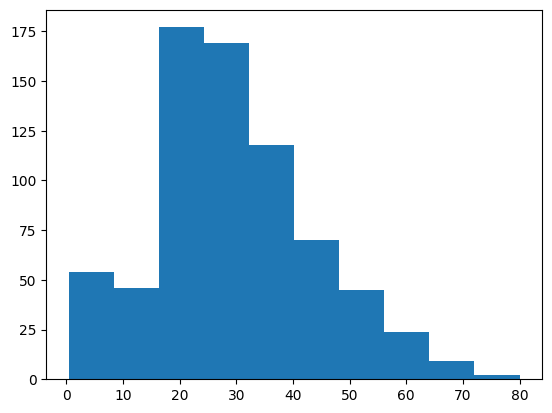

In [23]:
plt.hist(X_quantitative[:,0])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

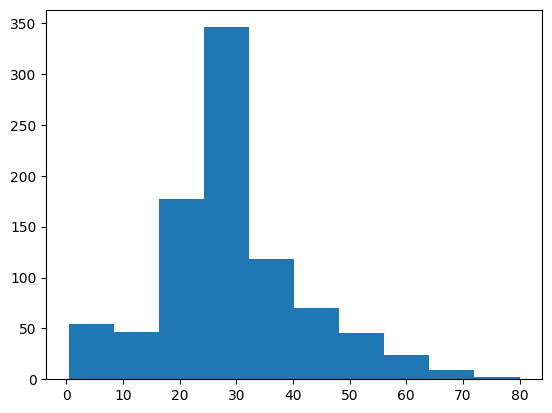

In [116]:
plt.hist(X_imputed_median[:,0])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

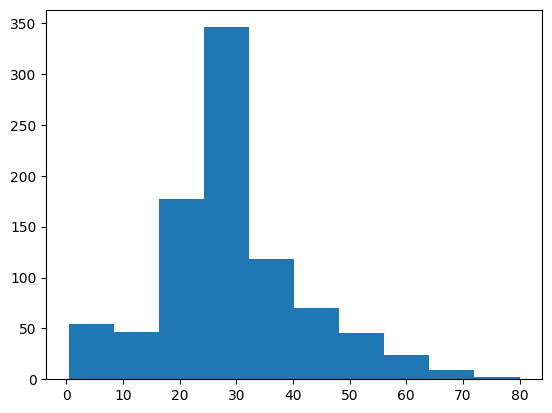

In [117]:
plt.hist(X_imputed_mean[:,0])

**4**.

In [26]:
simple_imputer_cat = SimpleImputer(strategy="most_frequent")
X_cat_imputed = simple_imputer_cat.fit_transform(X_categorical)

In [27]:
X_cat_imputed

array([[1, 2],
       [0, 0],
       [0, 2],
       ...,
       [0, 2],
       [1, 0],
       [1, 1]])

### KNN imputation
Another possibility is to use the `KNNImputer`, that uses only KNN.

In [29]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(X_quantitative)

KNNImputer()

**Questions**:
1. Use KNN imputation with $k=1$, $k=5$ and $k=1000$. 
2. How does the value of $k$ impact your imputation ? Analyze it using statistical estimators and graph.
3. Try doing the same with qualitative variables... what is the problem ? How can you resolve it ?

**1.**


In [31]:
from sklearn.impute import KNNImputer
imputed_Xs = []
for k in [1, 5, 200, 800]:
    knn_imputer = KNNImputer(n_neighbors=k)
    knn_imputer.fit(X_quantitative)
    imputed_Xs.append(knn_imputer.transform(X_quantitative))

**2.**

In [129]:
for imputation, k in zip(imputed_Xs, [1, 5, 200, 800]):
    print(f"k={k}")
    print(np.mean(imputation[:,0]))

k=1
31.1051290684624
k=5
29.638278338945007
k=200
29.47429618406285
k=800
29.69911764705882


**3**.

In [147]:
from sklearn.impute import KNNImputer

imputed_Xs = []
for k in [1]: ##### Attention, on ne peut pas faire de moyenne sur des catégories !
    knn_imputer = KNNImputer(n_neighbors=5)
    knn_imputer.fit(X_labelled)

In [148]:
knn_imputer.transform(X_labelled)

array([[ 1.    ,  2.    , 22.    ,  7.25  ],
       [ 0.    ,  0.    , 38.    , 71.2833],
       [ 0.    ,  2.    , 26.    ,  7.925 ],
       ...,
       [ 0.    ,  2.    , 28.    , 23.45  ],
       [ 1.    ,  0.    , 26.    , 30.    ],
       [ 1.    ,  1.    , 32.    ,  7.75  ]])

Now, save your dataset as `X_preprocessed` and use it in the rest of the labs/in your project.

## Feature transformation

In class, we saw two possible ways of reducing features:
- Min-max scaling
- Z-scaling/Standard-scaling

Many scalers are available in sklearn: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_quantitative)
scaled_quantitative = min_max_scaler.transform(X_quantitative)

# Autre manière de calculer la matrice transformée:
# scaled_quantitative = min_max_scaler.fit_transform(X_quantitative)

Text(0.5, 1.0, 'Yellow = survived, Purple = died')

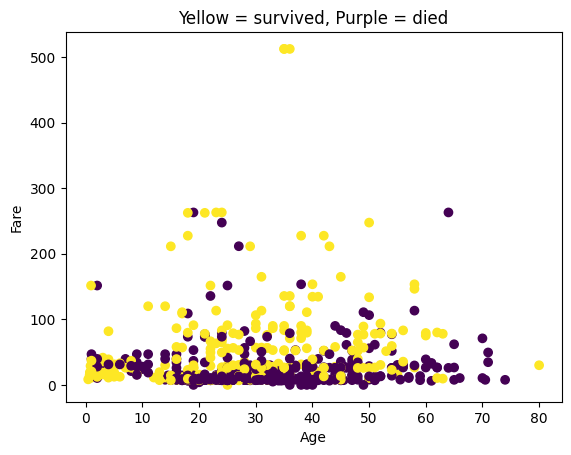

In [34]:
plt.scatter(X_quantitative[:,0], X_quantitative[:,1], c=y)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Yellow = survived, Purple = died")

Text(0.5, 1.0, 'Yellow = survived, Purple = died')

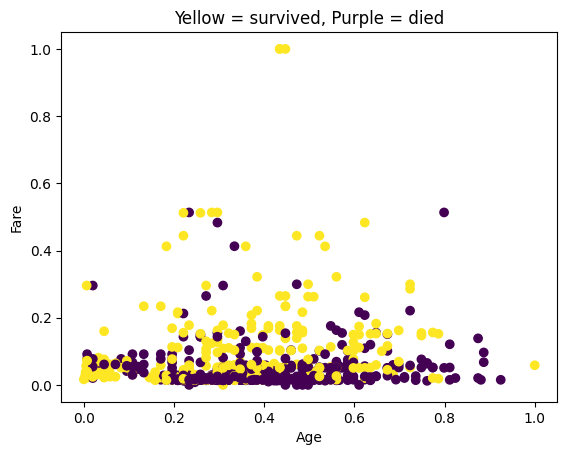

In [35]:
plt.scatter(scaled_quantitative[:,0], scaled_quantitative[:,1], c=y)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Yellow = survived, Purple = died")

**Questions**:
1. Can you apply every kind of scaling to every kind of algorithm ?
2. Apply min max scaling to your dataset and compare the repartition of the data on the parametric space.
2. Go back to the full pipeline and perform train/test validation with and without scaling and see how it affects the results (**be careful about data leaks**).

**1**. 

**Non**, dans les algorithmes "inteprétables" (arbres de régression, régression logistique ...) on perd en pouvoir d'explication (car on ne voit plus directement quelles sont les valeurs des splits dans les arbres par exemple). 

**2**.


In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X=X_quantitative)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

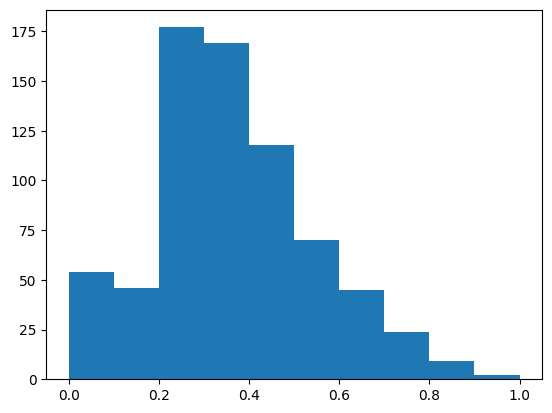

In [16]:
plt.hist(X_min_max_scaled[:,0])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

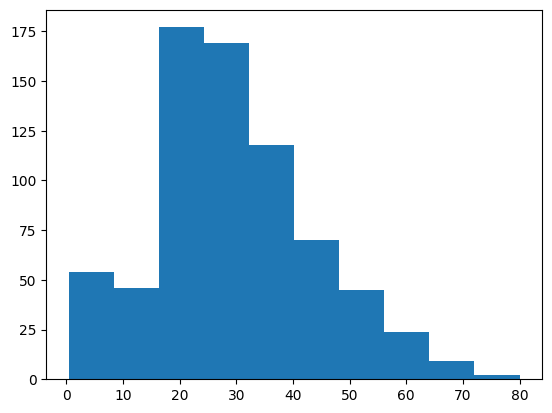

In [17]:
plt.hist(X_quantitative[:,0])

Text(0.5, 1.0, 'Yellow = survived, Purple = died')

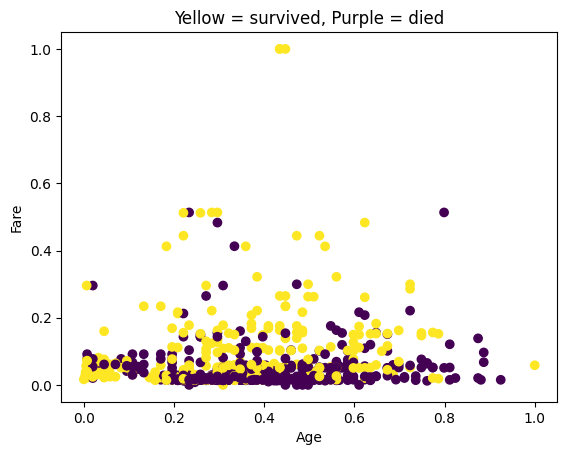

In [18]:
plt.scatter(X_min_max_scaled[:,0], X_min_max_scaled[:,1], c=y)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Yellow = survived, Purple = died")

**3 = révision de tout ce qu'on a fait jusqu'à présent !**

=> **A faire avec votre jeu de données**, vous pouvez commencer à rédiger les résultats.

> *NB*: **les data leaks**: le fait que des informations du jeu de données d'entraînement (ou du jeu de données global) se retrouve dans le jeu de données de test et fausse nos résultats !
> Si j'appelle mon "scaler" sklearn sur tout le jeu de données (ou sur X_train seulement) et qu'ensuite je l'applique à X_train et X_test.

In [26]:
###### ATTENTION à ne pas faire:

min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X=X_quantitative)

X_train = X_quantitative[:600]
X_test = X_quantitative[600:]

# A ne pas faire !!!!!!!!!!!!!!!!!!!!
# Data leak !!!
X_train_transformed = min_max_scaler.transform(X_train)
X_test_transformed = min_max_scaler.transform(X_test)


# A faire:

# Solution 1: on fait 2 scalers
min_max_scaler_train = MinMaxScaler()
X_min_max_scaled_train = min_max_scaler_train.fit(X_train)

min_max_scaler_test = MinMaxScaler()
X_min_max_scaled_test = min_max_scaler_test.fit(X_test)

# Solution 2: 

X_train_transformed = min_max_scaler.fit_transform(X_train)
X_test_transformed = min_max_scaler.fit_transform(X_test)

## Pipeline globale:

In [69]:
# Analyse de données et compréhension des variables et de la problématique (cf: partiel)
# Et choix d'un score pertinent

# Etape 1: Preprocessing

    # Transformer les variables qualitatives en "quantitative" 
        # Si jamais mon algorithme ne le prend pas nativement en compte, faire des variables dummy
        # Si jamais l'implémentation de sklearn a besoin d'entier, utiliser le label encoder.
        
    # Gérer les données manquantes:
        # Faire un bilan
        # Choisir une méthode d'imputation en la justifiant
    
    # Trouver les valeurs aberrantes:
        # Les analyser
        # Soit les traiter comme des valeurs manquantes
        # Soit les laisser
        

##### Fin de l'étape 1: un jeu de données propre !

# Etape 2: Classification
    # Faire un choix du classifieur que l'on souhaite utiliser (chacun ayant ses contraintes)
    
    # Faire un choix de la transformation des données qu'on va appliquer
    
    # Entraîner l'algorithme avec une approche soit:
        # train - test (si imposée par les contraintes externes)
        # validation croisée
    # pour trouver les hyperparamètres optimaux
    
    # Une fois sélectionnés, on fait l'entraînement sur tout le jeu de données et on sort le score final
    

In [39]:
from sklearn.preprocessing import OneHotEncoder

# On transforme les variables qualitatives en dummy (numérique)
one_hot_encoder = OneHotEncoder()
X_qualitative_dummy = one_hot_encoder.fit_transform(X_categorical)
X_all = np.concatenate([X_quantitative, X_qualitative_dummy.toarray()], axis=1)

# On part sur un KNNImputer, car nous avons montré dans la partie 2 que celui-ci est relativement
# efficace 
# On prend k=1 car nous avons des variables qualitatives

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=1)
X_all_imputed = knn_imputer.fit_transform(X_all)

# Regarder les valeurs aberrantes grâce à mes boxplots

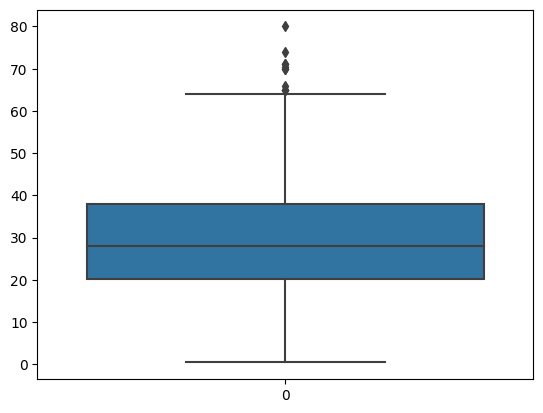

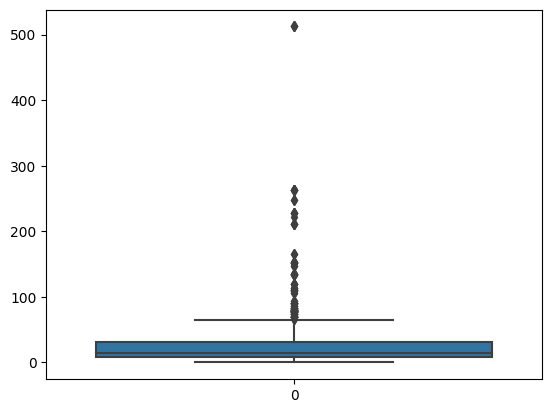

In [40]:
for X_val in X_quantitative.T:
    sns.boxplot(X_val)
    plt.show()
    
# Après l'examen des boxplots, je ne vois pas de valeur aberrantes: il y a certes des passagers beaucoup plus âgés que 
# la répartition médiane, mais cela est porteur de sens pour la classification.
# Idem pour le prix des billets: il n'est pas choquant qu'un bateau de luxe offre des billets extrêmement chers
# et certains beaucoup moins.

In [41]:
# Jeu de donnée propre à la fin de mon étape 1:
X_preprocessed = X_all_imputed

In [66]:
# On choisit d'appliquer un KNN mais il nous faut décider du k.
# On veut aussi savoir si jamais il est intéressant de scaler les données (car algorithme basé sur la distance).
# On choisit une approche de validation croisée.

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Sans scaling
for k in range(1, 30, 2):
    print(f"k = {k}")
    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)
    scores = cross_val_score(estimator=knn_classifier, X=X_preprocessed, y=y, scoring="accuracy")
    print(f"Model score: {round(np.median(scores)*100, 2)}%")


k = 1
Model score: 71.91%
k = 3
Model score: 71.35%
k = 5
Model score: 71.35%
k = 7
Model score: 71.35%
k = 9
Model score: 73.03%
k = 11
Model score: 73.6%
k = 13
Model score: 74.16%
k = 15
Model score: 73.6%
k = 17
Model score: 73.6%
k = 19
Model score: 74.16%
k = 21
Model score: 74.16%
k = 23
Model score: 75.28%
k = 25
Model score: 74.72%
k = 27
Model score: 74.16%
k = 29
Model score: 74.16%


In [44]:
# Avec scaling
from sklearn.metrics import balanced_accuracy_score
NBR_FOLDS=5

indexes = KFold(n_splits=NBR_FOLDS, shuffle=True)

balanced_accuracy_score_global = []

min_max_scaler = MinMaxScaler()

for k in range(1, 30, 2):
    print(f"k = {k}")

    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)
    
    balanced_accuracy_scores = []
    for ix, (train_index, test_index) in enumerate(indexes.split(X)):
        # Scale train data
        scaled_train = min_max_scaler.fit_transform(X_preprocessed[train_index])
        knn_classifier.fit(scaled_train, y[train_index])
        
        # Scale test data
        scaled_test = min_max_scaler.fit_transform(X_preprocessed[test_index])
        y_predict_fold = knn_classifier.predict(scaled_test)
        
        # Compute score
        balanced_accuracy = balanced_accuracy_score(y[test_index], y_predict_fold)
        balanced_accuracy_scores.append(balanced_accuracy)
        
    balanced_accuracy_score_global.append(np.median(balanced_accuracy_scores))
    print(f"Median score: {round(np.median(balanced_accuracy_scores)*100, 2)}%")

k = 1
Median score: 65.8%
k = 3
Median score: 74.34%
k = 5
Median score: 70.97%
k = 7
Median score: 74.77%
k = 9
Median score: 75.6%
k = 11
Median score: 77.47%
k = 13
Median score: 75.77%
k = 15
Median score: 78.59%
k = 17
Median score: 78.15%
k = 19
Median score: 74.94%
k = 21
Median score: 76.94%
k = 23
Median score: 76.6%
k = 25
Median score: 77.77%
k = 27
Median score: 78.33%
k = 29
Median score: 76.12%


In [98]:
# Avec scaling
from sklearn.metrics import balanced_accuracy_score
NBR_FOLDS=5

indexes = KFold(n_splits=NBR_FOLDS, shuffle=True)

balanced_accuracy_score_global = []

standard_scaler = StandardScaler()

for k in range(1, 30, 2):
    print(f"k = {k}")

    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)
    
    balanced_accuracy_scores = []
    for ix, (train_index, test_index) in enumerate(indexes.split(X)):
        # Scale train data
        scaled_train = standard_scaler.fit_transform(X_preprocessed[train_index])
        knn_classifier.fit(scaled_train, y[train_index])
        
        # Scale test data
        scaled_test = standard_scaler.fit_transform(X_preprocessed[test_index])
        y_predict_fold = knn_classifier.predict(scaled_test)
        
        # Compute score
        balanced_accuracy = balanced_accuracy_score(y[test_index], y_predict_fold)
        balanced_accuracy_scores.append(balanced_accuracy)
        
    balanced_accuracy_score_global.append(np.median(balanced_accuracy_scores))
    print(f"Median score: {round(np.median(balanced_accuracy_scores)*100, 2)}%")

k = 1
Median score: 67.37%
k = 3
Median score: 73.03%
k = 5
Median score: 76.15%
k = 7
Median score: 75.56%
k = 9
Median score: 75.05%
k = 11
Median score: 76.96%
k = 13
Median score: 77.04%
k = 15
Median score: 77.71%
k = 17
Median score: 75.68%
k = 19
Median score: 76.26%
k = 21
Median score: 78.61%
k = 23
Median score: 76.5%
k = 25
Median score: 76.84%
k = 27
Median score: 76.38%
k = 29
Median score: 77.34%


In [114]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_preprocessed)
knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(X_scaled, y)
y_pred = knn_classifier.predict(X_scaled)

accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)
print(f"Accuracy: {accuracy * 100}%")
print(f"Recall: {recall * 100}%")
print(f"Precision: {precision * 100}%")

Accuracy: 79.57351290684625%
Recall: 72.51461988304094%
Precision: 73.80952380952381%


Après l'ensemble des étapes, j'en déduis la *pipeline* suivante "optimale":
- On encode les variables selon un transformer dummy
- On impute les valeurs manquantes avec un KNN avec k=1
- On n'enlève aucune donnée extrême

- On choisit le min-max scaler
- On choisit k=25

- On obtient le score total en accuracy moyen de 79\%.